# Summary
This demonstrates reconstruction of a Fresnel CDI dataset and compares the result to ePIE reconstruction. 

The probe structure allows reconstruction in CDI mode, i.e. without real-space overlap constraints. 

Scanning CDI reconstruction is also possible here, but results in a lower-quality image because of scan position jitter in this dataset.

## Object ePIE reconstruction: 
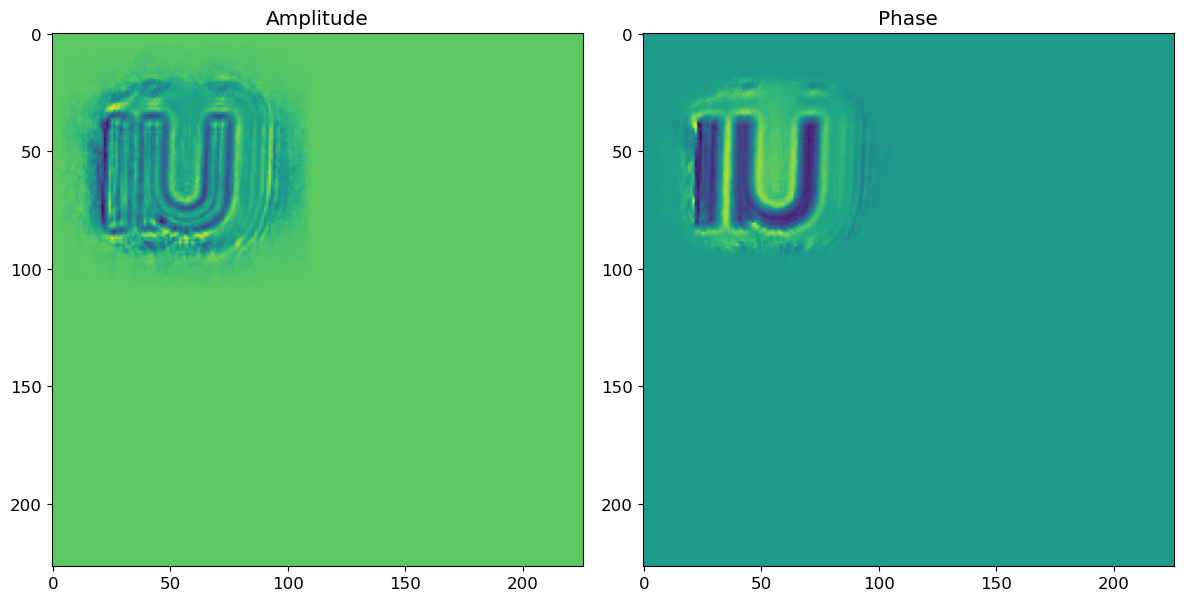

In [1]:
from scipy.ndimage import zoom
import numpy as np

def init():
    from ptycho import params as p
    
    p.cfg['nepochs'] = 100
    p.cfg['output_prefix'] = 'tmp'
    p.cfg['nimgs_train'] = 1
    p.cfg['nimgs_test'] = 1
    p.cfg['intensity_scale.trainable'] = True
    p.cfg['positions.provided'] = True
    p.cfg['probe.big'] = True
    p.cfg['probe.trainable'] = True
    p.cfg['probe.mask'] = True

    p.cfg['data_source'] = 'generic'
    p.cfg['gridsize'] = 1
    p.cfg['probe_scale'] = 4
    p.cfg['train_data_file_path'] = 'train_data.npz'
    p.cfg['test_data_file_path'] = 'test_data.npz'


# IMPORTANT: must call init() BEFORE the dataset definition
init()
data_file_path = 'xppl1026722_Run0396_recon.npz'

In [2]:
!ln -s ../tests/test_generic_loader.py
import test_generic_loader;
train_raw, test_raw = test_generic_loader.test_generic_loader(remove = False,
            data_file_path = data_file_path);

ln: failed to create symbolic link './test_generic_loader.py': File exists


2024-06-04 18:53:16.831362: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 18:53:16.831394: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 18:53:16.832516: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-04 18:53:16.837953: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 18:53:17.330168: W tensorflow/compiler/tf2

DEBUG: Setting probe_mask to tf.Tensor(
[[[[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]

  ...

  [[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]]


 [[[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]

  ...

  [[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]]


 [[[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]

  ...

  [[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]]


 ...


 [[[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]

  ...

  [[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]]


 [[[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]

  ...

  [[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]]


 [[[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]

  ...

  [[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]]], shape=(64, 64, 1, 1), dtype=complex64) in params
diff3d shape: (1087, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (1087,)
objectGuess shape: (227, 226)
xcoords shape: (1087,)
ycoords shape: (1087,)
xcoords_start shape: (1087,)
ycoords_start shape: (1087,)
diff3d shape: (512, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (512,)
objectGuess shape: (227, 226)
xcoords shape: (512,

In [3]:
# plt.imshow(np.angle(probeGuess2))
# plt.colorbar()

In [5]:
from ptycho import probe
from ptycho import params as p

from ptycho import xpp
ptycho_data, ptycho_data_train, obj = xpp.load_ptycho_data(data_file_path)

diff3d shape: (1572, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (1572,)
objectGuess shape: (229, 313)
xcoords shape: (1572,)
ycoords shape: (1572,)
xcoords_start shape: (1572,)
ycoords_start shape: (1572,)
diff3d shape: (512, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (512,)
objectGuess shape: (229, 313)
xcoords shape: (512,)
ycoords shape: (512,)
xcoords_start shape: (512,)
ycoords_start shape: (512,)


In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_tiff_image(file_path: str) -> Image:
    """Load a TIFF image from the given file path."""
    return Image.open(file_path)

def convert_to_array(image: Image) -> np.ndarray:
    """Convert a PIL Image to a 2D NumPy array."""
    image_array = np.array(image)
    assert len(image_array.shape) == 2, "The image is not grayscale."
    return image_array

def display_heatmap(image_array: np.ndarray) -> None:
    """Display a heatmap of the 2D NumPy array."""
    plt.imshow(image_array, cmap='hot', interpolation='nearest')
    plt.colorbar()  # Add a colorbar to the heatmap
    plt.title('Heatmap of Grayscale Image')
    plt.show()

# Example usage
file_path = '/home/ollie/Downloads/probe_174.tiff'
image = load_tiff_image(file_path)
probephase = convert_to_array(image)
# display_heatmap(image_array)

# Example usage
file_path = '/home/ollie/Downloads/final_probe_KMPIE_2024_05_20-12_56_23-0_mag@1.tiff'
image = load_tiff_image(file_path)
probeamp = convert_to_array(image)
# display_heatmap(image_array)

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_tiff_image(file_path: str) -> Image:
    """Load a TIFF image from the given file path."""
    return Image.open(file_path)

def convert_to_array(image: Image) -> np.ndarray:
    """Convert a PIL Image to a 2D NumPy array."""
    image_array = np.array(image)
    assert len(image_array.shape) == 2, "The image is not grayscale."
    return image_array

def binning(image_array: np.ndarray, bin_size: int) -> np.ndarray:
    """Perform binning on the image array."""
    shape = (image_array.shape[0] // bin_size, image_array.shape[1] // bin_size)
    binned_array = image_array.reshape(shape[0], bin_size, shape[1], bin_size).mean(axis=(1, 3))
    return binned_array

def combine_phase_amplitude(probephase: np.ndarray, probeamp: np.ndarray) -> np.ndarray:
    """Combine phase and amplitude into a complex-valued array."""
    return probeamp * np.exp(1j * probephase)


# Perform 4x4 binning
bin_size = 4
probephase_binned = binning(probephase, bin_size)
probeamp_binned = binning(probeamp, bin_size * 2)

# Combine the binned phase and amplitude into a complex-valued array
probeGuess = combine_phase_amplitude(probephase_binned, probeamp_binned)

# Check the shape and dtype
print(probeGuess.shape, probeGuess.dtype)


(64, 64) complex64


In [7]:
# probeGuess = ptycho_data.probeGuess
objectGuess = ptycho_data.objectGuess 


probe_amp = np.absolute(probeGuess)
mask = np.absolute(p.get('probe_mask'))[:, :, 0, 0]
probe.set_probe_guess(None, probeGuess)

from ptycho.evaluation import save_metrics
from ptycho.evaluation import trim
from ptycho import tf_helper as hh

DEBUG: Setting probe to tf.Tensor(
[[[0.24513207+3.9647834e-04j]
  [0.24171655+2.5836802e-03j]
  [0.18949626-3.7590525e-04j]
  ...
  [0.20089673+2.4611957e-03j]
  [0.19481932+2.5334149e-03j]
  [0.14358994-3.1615477e-03j]]

 [[0.1624289 +2.6403375e-03j]
  [0.1662417 -1.5242840e-04j]
  [0.20157598-6.0806503e-03j]
  ...
  [0.16314782-1.4737821e-03j]
  [0.1666407 -1.2854850e-03j]
  [0.25152797+3.9766850e-03j]]

 [[0.19835502-2.7788989e-03j]
  [0.23875242-1.0401183e-03j]
  [0.19475195-1.4490891e-03j]
  ...
  [0.14973773+8.4726413e-04j]
  [0.19975568+3.3371048e-03j]
  [0.17380959+2.6828024e-04j]]

 ...

 [[0.19424047+8.2452856e-03j]
  [0.20535293-2.4549316e-03j]
  [0.16963859-6.8440754e-03j]
  ...
  [0.1967144 -4.5931502e-03j]
  [0.23616873+4.8348596e-03j]
  [0.21060835+4.3292521e-03j]]

 [[0.17838436-6.8115821e-04j]
  [0.2507963 -8.1520120e-04j]
  [0.1283232 -8.8810793e-06j]
  ...
  [0.20662016-1.6073117e-03j]
  [0.12540369-2.2677714e-03j]
  [0.17713942+2.4476976e-03j]]

 [[0.17072193-5.476

In [8]:
import tensorflow as tf

tf.random.set_seed(45)
np.random.seed(45)
from ptycho import params as p
from ptycho import train, model
from ptycho.train import *
from ptycho.nbutils import *

# channel dimensions size should be 1 in CDI mode, 4 in ptycho mode
ptycho_dataset.test_data.X.shape, ptycho_dataset.train_data.X.shape

DEBUG: Setting timestamp to 06/04/2024, 18:53:41 in params
diff3d shape: (1572, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (1572,)
objectGuess shape: (229, 313)
xcoords shape: (1572,)
ycoords shape: (1572,)
xcoords_start shape: (1572,)
ycoords_start shape: (1572,)
diff3d shape: (512, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (512,)
objectGuess shape: (229, 313)
xcoords shape: (512,)
ycoords shape: (512,)
xcoords_start shape: (512,)
ycoords_start shape: (512,)
DEBUG: nsamples: 1
neighbor-sampled diffraction shape (1572, 64, 64, 1)
DEBUG: nsamples: 1
neighbor-sampled diffraction shape (512, 64, 64, 1)


2024-06-04 18:53:42.039235: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


INFO: None
<PtychoDataContainer X=(1572, 64, 64, 1) Y_I=(1572, 64, 64, 1) Y_phi=(1572, 64, 64, 1) norm_Y_I=() coords_nominal=(1572, 1, 2, 1) coords_true=(1572, 1, 2, 1) nn_indices=(1572, 1) mean=785.500 global_offsets=(1572, 1, 2, 1) mean=134.963 local_offsets=(1572, 1, 2, 1) mean=0.000 probe=(64, 64, 1)>
INFO: None
<PtychoDataContainer X=(512, 64, 64, 1) Y_I=(512, 64, 64, 1) Y_phi=(512, 64, 64, 1) norm_Y_I=() coords_nominal=(512, 1, 2, 1) coords_true=(512, 1, 2, 1) nn_indices=(512, 1) mean=255.500 global_offsets=(512, 1, 2, 1) mean=150.508 local_offsets=(512, 1, 2, 1) mean=0.000 probe=(64, 64, 1)>
INFO: train data:
<PtychoDataContainer X=(1572, 64, 64, 1) Y_I=(1572, 64, 64, 1) Y_phi=(1572, 64, 64, 1) norm_Y_I=() coords_nominal=(1572, 1, 2, 1) coords_true=(1572, 1, 2, 1) nn_indices=(1572, 1) mean=785.500 global_offsets=(1572, 1, 2, 1) mean=134.963 local_offsets=(1572, 1, 2, 1) mean=0.000 probe=(64, 64, 1)>
INFO: test data:
<PtychoDataContainer X=(512, 64, 64, 1) Y_I=(512, 64, 64, 1) Y_

2024-06-04 18:53:43.705246: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-06-04 18:53:43.705265: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-06-04 18:53:43.705290: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1883] Profiler found 1 GPUs
2024-06-04 18:53:43.705559: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:137] cuptiGetTimestamp: error 999: 
2024-06-04 18:53:43.705569: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:186] cuptiSubscribe: ignored due to a previous error.
2024-06-04 18:53:43.705573: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:459] cuptiGetResultString: ignored due to a previous error.
2024-06-04 18:53:43.705577: E external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1935] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with

DEBUG: Setting intensity_scale to 1689.4489 in params
DEBUG: Setting probe to tf.Tensor(
[[[[0.13080782+2.1156948e-04j]]

  [[0.12898521+1.3787081e-03j]]

  [[0.10111933-2.0059122e-04j]]

  ...

  [[0.10720287+1.3133476e-03j]]

  [[0.10395983+1.3518854e-03j]]

  [[0.07662272-1.6870707e-03j]]]


 [[[0.0866756 +1.4089416e-03j]]

  [[0.0887102 -8.1339116e-05j]]

  [[0.10756534-3.2447674e-03j]]

  ...

  [[0.08705923-7.8644225e-04j]]

  [[0.0889231 -6.8596279e-04j]]

  [[0.1342208 +2.1220457e-03j]]]


 [[[0.10584656-1.4828810e-03j]]

  [[0.1274035 -5.5502978e-04j]]

  [[0.10392388-7.7326555e-04j]]

  ...

  [[0.07990331+4.5211861e-04j]]

  [[0.10659398+1.7807517e-03j]]

  [[0.09274858+1.4316018e-04j]]]


 ...


 [[[0.10365094+4.3998640e-03j]]

  [[0.1095808 -1.3100050e-03j]]

  [[0.09052285-3.6521477e-03j]]

  ...

  [[0.10497109-2.4510049e-03j]]

  [[0.12602478+2.5799864e-03j]]

  [[0.1123852 +2.3101831e-03j]]]


 [[[0.09518978-3.6348085e-04j]]

  [[0.13383037-4.3500910e-04j]]

  [[0.0684

2024-06-04 18:53:46.425357: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x59a4bc8c8c50
2024-06-04 18:53:46.483800: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-06-04 18:53:46.561586: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-04 18:53:47.576025: I external/local_xla/xla/service/service.cc:168] XLA service 0x786ffdce19b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-04 18:53:47.576044: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-06-04 18:53:47.580588: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1717541627.724356  830268 device_compiler.h:186] Compiled cluster 

94/94 [==============================] - 10s 31ms/step - loss: 967083520.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 217.0039 - distribution_lambda_loss: 967083520.0000 - val_loss: 574625792.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 193.9216 - val_distribution_lambda_loss: 574625792.0000 - lr: 0.0010
Epoch 2/100
94/94 [==============================] - 1s 12ms/step - loss: 389219872.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 165.8100 - distribution_lambda_loss: 389219872.0000 - val_loss: 267851056.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 140.2136 - val_distribution_lambda_loss: 267851056.0000 - lr: 0.0010
Epoch 3/100
94/94 [==============================] - 1s 12ms/step - loss: 232578448.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 128.4128 - distribution_lambda_loss: 232578448.0000 - val_loss: 180997104.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 109.3919 

(TensorShape([512, 64, 64, 1]), TensorShape([1572, 64, 64, 1]))

# Dataset description

In [9]:
print(test_raw)

RawData: 
xcoords: (512,) 
ycoords: (512,) 
xcoords_start: (512,) 
ycoords_start: (512,) 
diff3d: (512, 64, 64) 
probeGuess: (64, 64) 
scan_index: (512,) 
objectGuess: Present


In [10]:
test_data = ptycho_dataset.test_data
train_data = ptycho_dataset.train_data

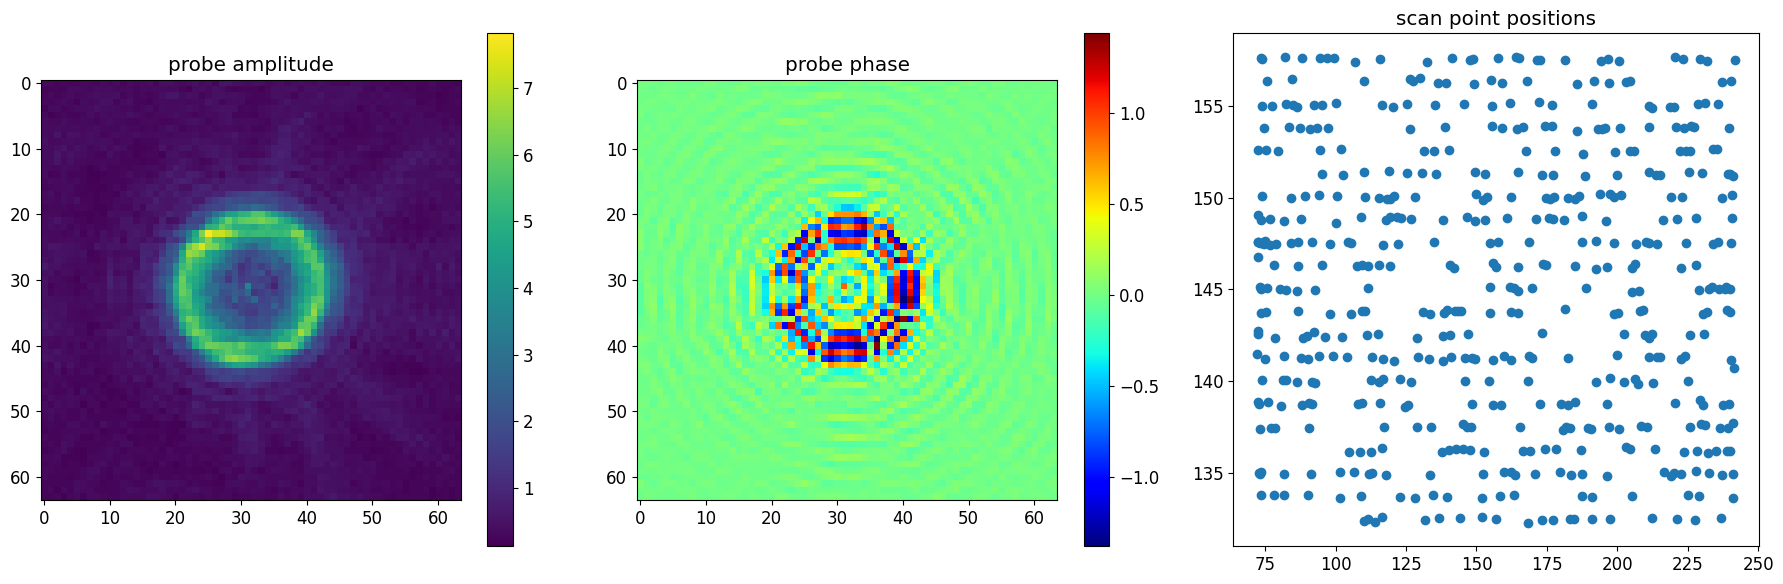

In [11]:
# Note the randomized scan point positions
probeshow(probeGuess, ptycho_dataset.test_data)

## Reconstruct the full test object image and compare to the ePIE reconstruction:

In [13]:
from ptycho import loader

16/16 [==============================] - 0s 6ms/step
PADDING SIZE: 86
PADDING SIZE: 86


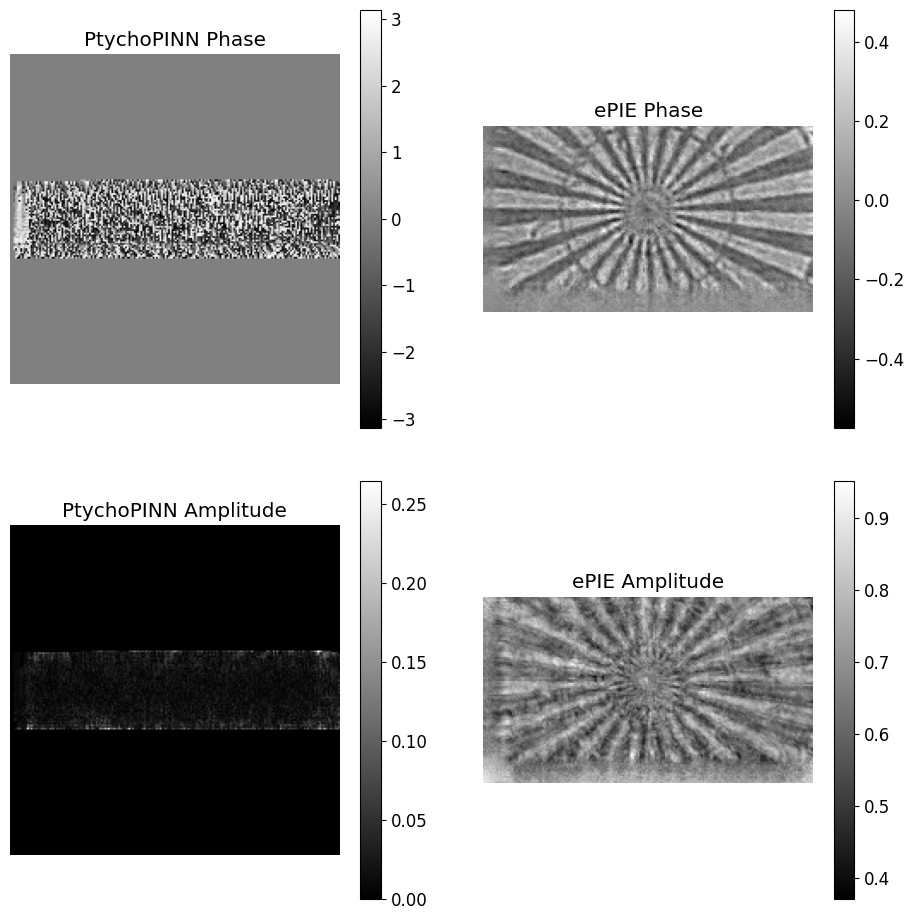

CPU times: user 511 ms, sys: 206 ms, total: 717 ms
Wall time: 592 ms


In [14]:
%%time
obj_tensor_full, global_offsets = reconstruct_image(test_data)
obj_image = loader.reassemble_position(obj_tensor_full, global_offsets[:, :, :, :], M = 20)

recon_amp_ptychopinn = np.absolute(obj_image)
recon_phase_ptychopinn = np.angle(obj_image)

ptycho_pinn_phase = recon_phase_ptychopinn[..., 0]
ptycho_pinn_amplitude = recon_amp_ptychopinn[..., 0]

epie_phase = crop_to_non_uniform_region_with_buffer(np.angle(objectGuess), buffer=-20)
epie_amplitude = crop_to_non_uniform_region_with_buffer(np.absolute(objectGuess), buffer=-20)

mk_epie_comparison2x2(ptycho_pinn_phase, epie_phase, ptycho_pinn_amplitude,epie_amplitude)

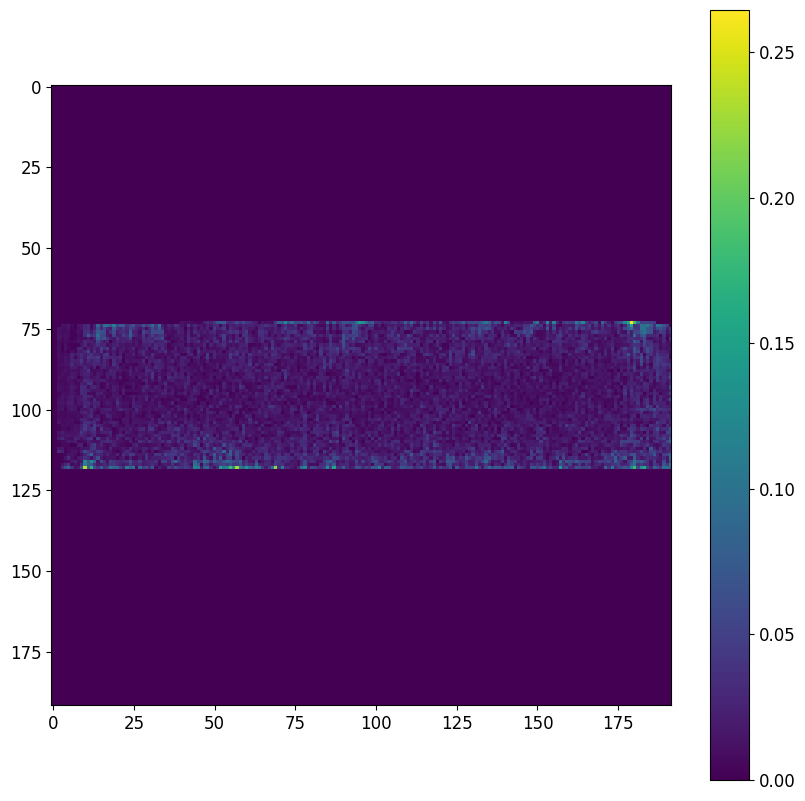

In [15]:
plt.imshow(ptycho_pinn_amplitude)
plt.colorbar()

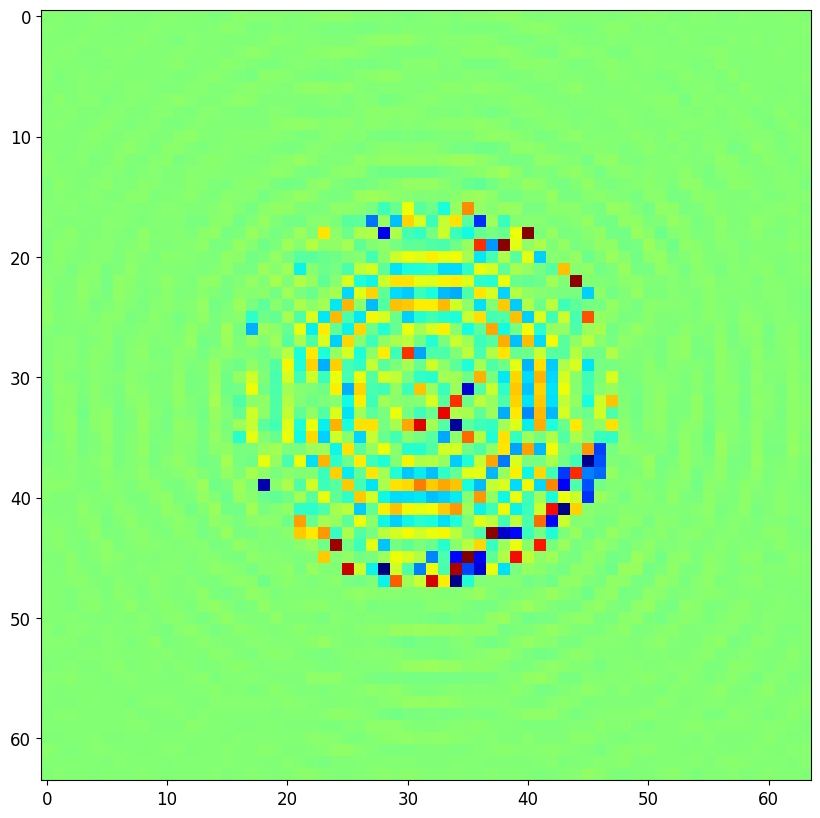

In [16]:
plt.imshow(np.angle(model.autoencoder.variables[-1]), cmap = 'jet')


Reconstruction for a single solution region:

In [17]:
Y_phi_test.shape

TensorShape([512, 64, 64, 1])

phase min: -3.1415925 phase max: 3.1415923


/home/ollie/anaconda3/envs/py310_3/lib/python3.10/site-packages/ptycho/evaluation.py:80: RuntimeWarning: divide by zero encountered in log
  true_diffraction = np.log(X_test)[i, :, :, channel]


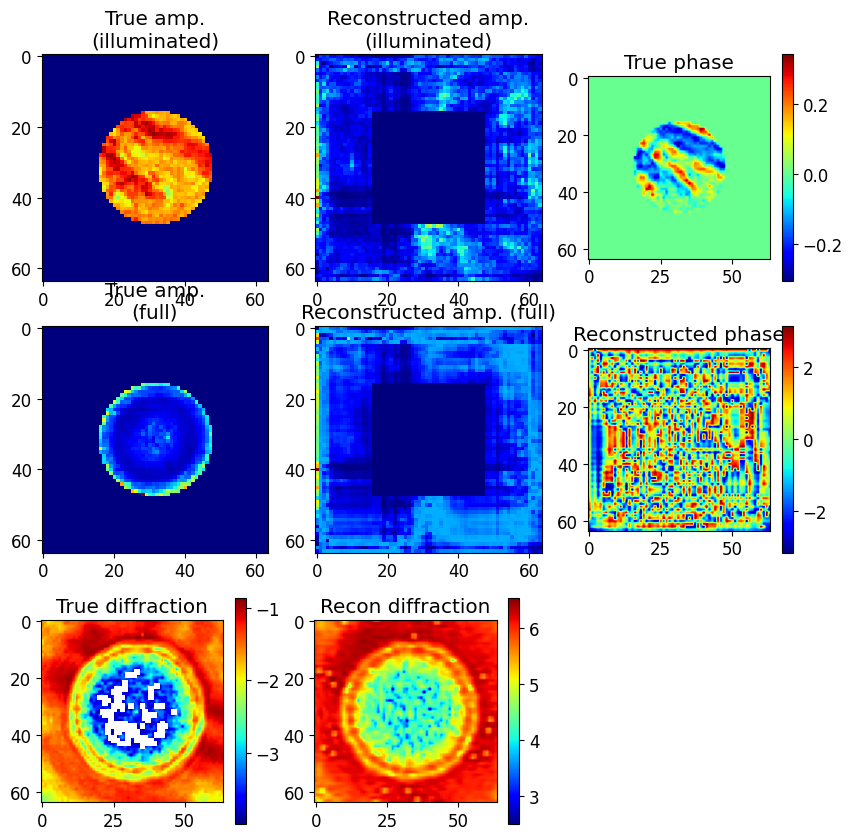

In [27]:
i = 200
from ptycho import evaluation
evaluation.summarize(i, pred_amp + 1, reconstructed_obj, X_test, Y_I_test, Y_phi_test,
                     np.absolute(p.get('probe')[:, :, 0, 0]), 0,
                    crop = False);

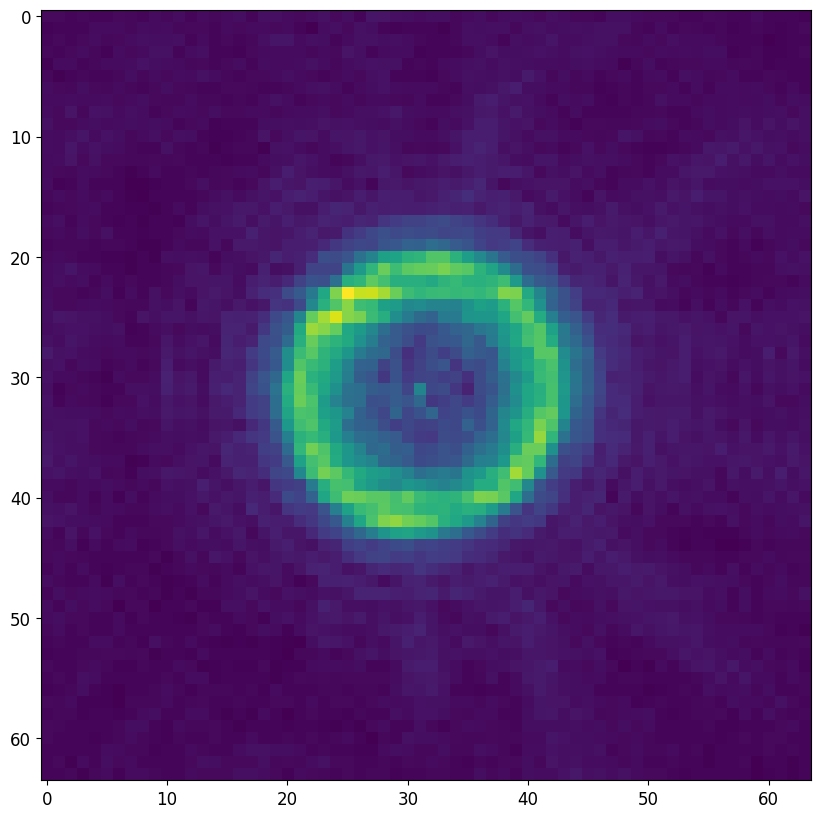

In [24]:
plt.imshow(np.abs(p.get('probe')[:, :, 0, 0]))

In [20]:
%pdb

Automatic pdb calling has been turned ON
